In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd drive/MyDrive/Colab Notebooks/yapay zeka veriler

/content/drive/MyDrive/Colab Notebooks/yapay zeka veriler


In [3]:
import numpy as np
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_path = './Dataset/train'
valid_path = './Dataset/val'
test_path = './Dataset/test'
img_size =  (224,224,3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 30

In [5]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             channel_shift_range = 10,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

In [6]:
train_dataset = datagen.flow_from_directory(directory = train_path, 
                                                  color_mode = "rgb",
                                                  target_size = (224,224),
                                                  interpolation = 'bicubic',
                                                  class_mode = "categorical", 
                                                  shuffle = True,
                                                  batch_size = BATCH_SIZE)

validation_dataset  = datagen.flow_from_directory(directory = valid_path,
                                            color_mode = "rgb",
                                            target_size = (224,224),
                                            interpolation = 'bicubic',
                                            class_mode = "categorical",
                                            shuffle = False,
                                            batch_size = BATCH_SIZE)
test_dataset  = datagen.flow_from_directory(directory = test_path,
                                           color_mode = "rgb",
                                           target_size = (224,224),
                                           interpolation = 'bicubic',
                                           class_mode = "categorical",
                                           shuffle = False,
                                           batch_size = BATCH_SIZE)

Found 306 images belonging to 2 classes.
Found 131 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [7]:
import tensorflow as tf
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [11]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [12]:
base_model.trainable = False
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(8, 5, 5, 2048)


In [13]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 2048)


In [14]:
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 2)


In [15]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [16]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [19]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset)

Epoch 1/30
39/39 [==============================] - 74s 2s/step - loss: 0.7753 - accuracy: 0.6176 - val_loss: 0.5980 - val_accuracy: 0.6565
Epoch 2/30
39/39 [==============================] - 64s 2s/step - loss: 0.6768 - accuracy: 0.6176 - val_loss: 0.5749 - val_accuracy: 0.6870
Epoch 3/30
39/39 [==============================] - 63s 2s/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 0.5015 - val_accuracy: 0.7252
Epoch 4/30
39/39 [==============================] - 66s 2s/step - loss: 0.5835 - accuracy: 0.6765 - val_loss: 0.4676 - val_accuracy: 0.7939
Epoch 5/30
39/39 [==============================] - 62s 2s/step - loss: 0.5942 - accuracy: 0.7059 - val_loss: 0.5637 - val_accuracy: 0.6565
Epoch 6/30
39/39 [==============================] - 62s 2s/step - loss: 0.5624 - accuracy: 0.7092 - val_loss: 0.4230 - val_accuracy: 0.8244
Epoch 7/30
39/39 [==============================] - 87s 2s/step - loss: 0.4985 - accuracy: 0.7484 - val_loss: 0.4776 - val_accuracy: 0.8015
Epoch 8/30
39/39 [==

In [24]:
history2=model.fit(train_dataset,
                  epochs=20,
                  validation_data=validation_dataset)

Epoch 1/20
39/39 [==============================] - 85s 2s/step - loss: 0.2810 - accuracy: 0.8791 - val_loss: 0.3689 - val_accuracy: 0.8397
Epoch 2/20
39/39 [==============================] - 62s 2s/step - loss: 0.2959 - accuracy: 0.8758 - val_loss: 0.3008 - val_accuracy: 0.8855
Epoch 3/20
39/39 [==============================] - 84s 2s/step - loss: 0.2766 - accuracy: 0.9020 - val_loss: 0.3619 - val_accuracy: 0.8397
Epoch 4/20
39/39 [==============================] - 61s 2s/step - loss: 0.2944 - accuracy: 0.9020 - val_loss: 0.3559 - val_accuracy: 0.8244
Epoch 5/20
39/39 [==============================] - 66s 2s/step - loss: 0.3201 - accuracy: 0.8660 - val_loss: 0.3376 - val_accuracy: 0.8550
Epoch 6/20
39/39 [==============================] - 65s 2s/step - loss: 0.2980 - accuracy: 0.8660 - val_loss: 0.3154 - val_accuracy: 0.8626
Epoch 7/20
39/39 [==============================] - 65s 2s/step - loss: 0.2675 - accuracy: 0.8954 - val_loss: 0.3282 - val_accuracy: 0.8855
Epoch 8/20
39/39 [==

In [25]:
score = model.evaluate(test_dataset)
print("Accuracy: ",score[1])

11/11 [==============================] - 12s 1s/step - loss: 0.2602 - accuracy: 0.8736
Accuracy:  0.8735632300376892


In [26]:
from sklearn.metrics import classification_report
test_labels = test_dataset.classes 
predictions = model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(test_labels, y_pred, target_names = test_dataset.class_indices))

11/11 [==============================] - 13s 1s/step
              precision    recall  f1-score   support

       Curuk       0.75      0.93      0.83        29
        Taze       0.96      0.84      0.90        58

    accuracy                           0.87        87
   macro avg       0.86      0.89      0.86        87
weighted avg       0.89      0.87      0.88        87



In [20]:
score = model.evaluate(test_dataset)
print("Accuracy: ",score[1])

11/11 [==============================] - 30s 3s/step - loss: 0.3267 - accuracy: 0.8736
Accuracy:  0.8735632300376892


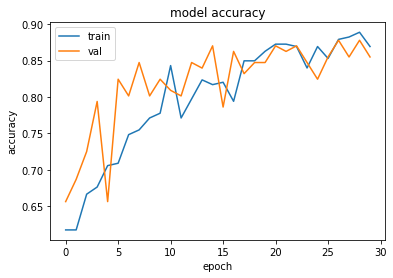

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

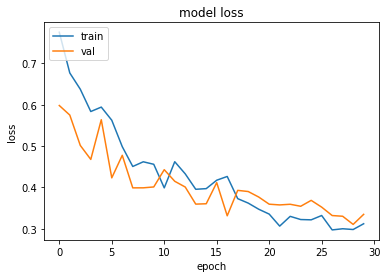

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import classification_report
test_labels = test_dataset.classes 
predictions = model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(test_labels, y_pred, target_names = test_dataset.class_indices))

11/11 [==============================] - 28s 2s/step
              precision    recall  f1-score   support

       Curuk       0.82      0.79      0.81        29
        Taze       0.90      0.91      0.91        58

    accuracy                           0.87        87
   macro avg       0.86      0.85      0.86        87
weighted avg       0.87      0.87      0.87        87

